<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula3b_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np

def criaDatasetRegressão(n=20, slop=0.5, intercept=0):
  X = np.random.uniform(size=(n,1))
  AUX = np.random.rand(n,1)-0.5
  y = X*slop+intercept + AUX*0.1
  y = y.flatten()
  return X, y

slop=-0.3
intercept = 1
X, y = criaDatasetRegressão(slop=slop, intercept=intercept)
X.shape, y.shape

((20, 1), (20,))

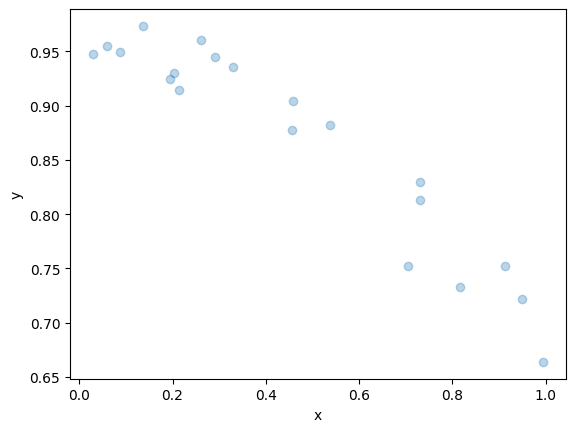

In [40]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.xlabel('x')
  plt.ylabel('y')
  plt.plot(X[:,0], y, 'o', alpha=0.3)

plotDataset(X, y)

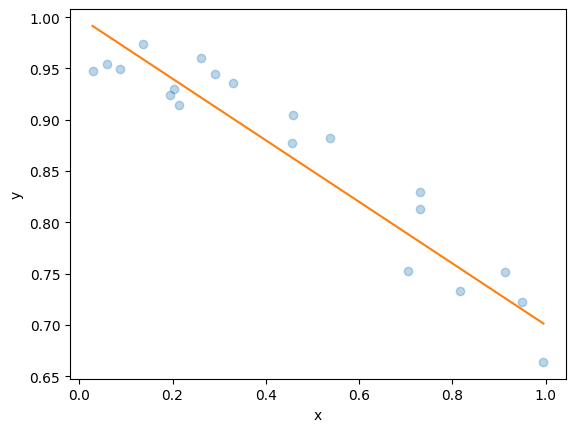

In [41]:
def plotHiperplano(X, y, vetor, intercept=0):
  xmin = min(X)
  xmax = max(X)
  xs = np.linspace(xmin, xmax, num=2)
  ys = xs * slop + intercept
  plt.plot(xs, ys)

plotDataset(X, y)
vetor_hiperplano = np.array(slop) * np.array([1, -1])
plotHiperplano(X, y, vetor_hiperplano, intercept)

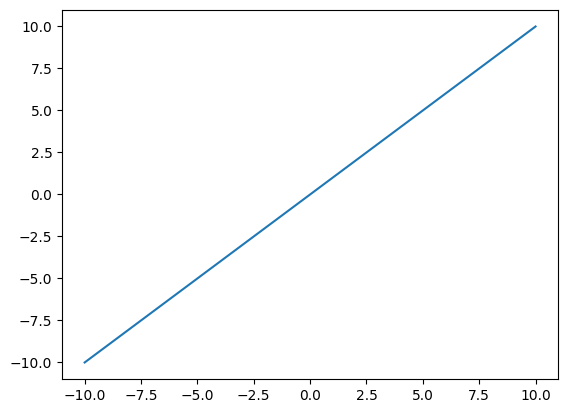

In [42]:
def identity(a):
  return a

a = np.linspace(-10,10,100)
out = identity(a)
plt.plot(a, out)
plt.show()

In [43]:
from abc import ABC, abstractstaticmethod

class Custo(ABC):
  @abstractstaticmethod
  def custo(y, ypred):
    pass
  @abstractstaticmethod
  def gradiente(y, ypred, X):
    pass

class WidrowHoff(Custo):
  @staticmethod
  def custo(y, ypred):
    return np.sum((y-ypred)**2)
  @staticmethod
  def gradiente(y, ypred, X):
    return X.T @ (y - ypred)


In [44]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
  @abstractmethod
  def getW(self, X, y, activation=None):
    pass

class DescidaGradiente(TrainingAlgorithm):
  def __init__(self, max_iter=500, learning_rate=0.01,
               regularization=0, cost=WidrowHoff()):
    self.max_iter = max_iter
    self.learning_rate = learning_rate
    self.regularization = regularization
    self.cost = cost

  def getW(self, X, y):
    w = np.random.uniform(-1, 1, size=X.shape[1])
    for _ in range(self.max_iter):
      ypred = X @ w
      erros = y - ypred
      if self.cost.custo(y, ypred) == 0:
        break
      w *= 1 - self.regularization * self.learning_rate
      w += self.cost.gradiente(y, ypred, X) * self.learning_rate
    return w


In [47]:
from sklearn.base import BaseEstimator, ClassifierMixin

def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, training_algorithm=DescidaGradiente()):
    self.w = None
    self.activation = identity
    self.training_algorithm = training_algorithm

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = self.training_algorithm.getW(Xb, y)

  def __pre_activation(self, X):
    Xb = include_bias(X)
    return Xb @ self.w

  def predict(self, X):
    a = self.__pre_activation(X)
    ypred = self.activation(a)
    return ypred


0.0009120160775215727
[ 0.99679457 -0.28243859]
0.001024557779380094


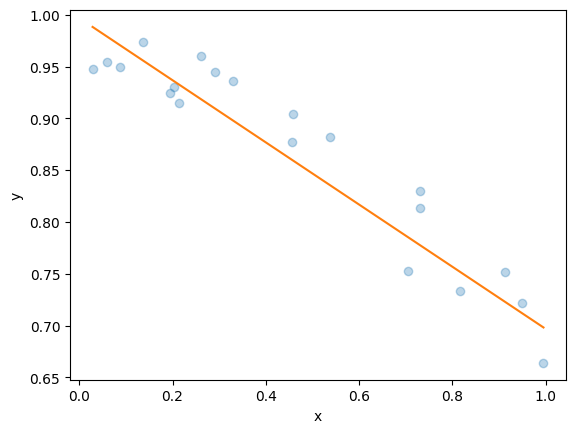

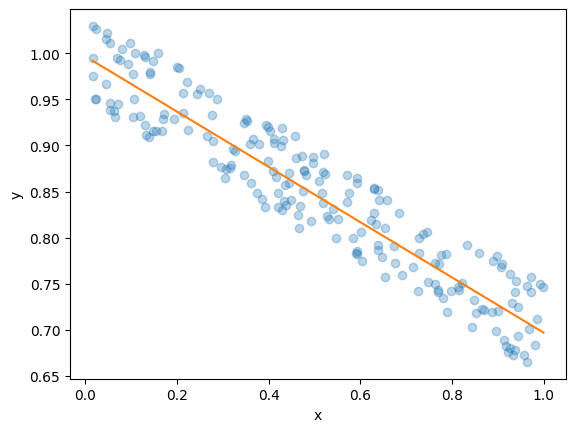

In [50]:
from sklearn.metrics import mean_squared_error

costs = [
    WidrowHoff()
    ]
Xte, yte = criaDatasetRegressão(200, slop, intercept)
for cost in costs:
  # for _ in range(2):
    perceptron = Perceptron(training_algorithm=DescidaGradiente(cost=cost))
    perceptron.fit(X, y)
    ypred = perceptron.predict(X)
    print(mean_squared_error(y, ypred))
    print(perceptron.w)
    plotDataset(X, y)
    # plotDataset(X, ypred)
    plotHiperplano(X, y, perceptron.w[1:], perceptron.w[0])
    ypred = perceptron.predict(Xte)
    print(mean_squared_error(yte, ypred))
    # print(perceptron.w)
    plt.show()
    plotDataset(Xte, yte)
    # plotDataset(X, ypred)
    plotHiperplano(Xte, yte, perceptron.w[1:], perceptron.w[0])
    plt.show()